# **Competitor Benchmarking**



## **Introduction**

This project aims to understand the pattern of ride-sharing activities in the city of Chicago that will helps Zuber to successfully penetrate in this particular area.

### Goal

1. Understanding the habit of passanger during certain condition of weather and destination.
2. 10 Top destination of ride-sharing service.
3. 10 Top taxi companies in Chicago area.
4. Testing hyphothesis.

### Stages

The project's phases are outlined below.

1. Open the data file and study its general information.

2. Prepare the data.

- Rename the column (use lowercase letters for all).
- Convert the data to the required data type.
- Describe which columns have had their data types changed and explain the reasons.
- If necessary, missing values will be handled
- Calculate the total sales (sales quantity across all regions) for each game and input these values into a separate column.

3. Using python to understand the top 10 destinations.

- Sort table to get the top 10 destinations in Chicago.
- Sort the top taxi companies performance.
- Create the graph to help visualize.
- Get the main summary.

4. Using python to testing the hyphothesis of certain trip pattern. In this case we will test that trip to O'Hare from Loop changed during bad weather.

- Set the H0: The average trip from Loop to O'Hare airport during rain on Saturday is the same.
- Set the H1: The average trip from Loop to O'Hare airport during rain on Saturday is different.
- Set alpha: in this case we will use 0.05

5. Draw the final conclusion

### Data Content

1. Neighborhoods Table: Data related to areas in the city of Chicago

- name: neighborhood name
- neighborhood_id: neighborhood code

2. Cabs Table: Data related to taxis

- cab_id: vehicle code
- vehicle_id: technical vehicle ID
- company_name: name of the company that owns the vehicle

3. Trips Table: Data related to trips

- trip_id: trip code
- cab_id: operating vehicle code
- start_ts: date and time trip started (time rounded to the nearest hour)
- end_ts: date and time trip ended (time rounded to the nearest hour)
- duration_seconds: trip duration in seconds
- distance_miles: trip distance in miles
- pickup_location_id: pickup location code
- dropoff_location_id: drop-off location code

4. Weather Records Table: Data related to weather

- record_id: weather recording code
- ts: date and time when weather recording was done (time rounded to the nearest hour)
- temperature: temperature at the time of weather recording
- description: brief description of weather conditions, such as "light rain" or "scattered clouds."

## **Initiations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind
import scipy.stats as stats

Load data given:

In [2]:
taxi = pd.read_csv('/content/moved_project_sql_result_01.csv')
trips = pd.read_csv('/content/moved_project_sql_result_04.csv')
trip_ohare = pd.read_csv('/content/moved_project_sql_result_07.csv')

Study general informastion

In [3]:
# Taxi table
taxi.head(3)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367


In [4]:
taxi.shape

(64, 2)

In [5]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
taxi.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
# Trips table
trips.head(3)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667


In [8]:
trips.shape

(94, 2)

In [9]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
trips.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
# Loop to O'Hare trips
trip_ohare.head(3)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0


In [12]:
trip_ohare.shape

(1068, 3)

In [13]:
trip_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
trip_ohare.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

## **Exploratory Data Analysis**

### **Top 10 destination & Top 10 taxi companies**

In [15]:
trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [16]:
trips_10 = trips.sort_values(by='average_trips', ascending=False)[:10]

In [17]:
trips_10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [18]:
taxi_10 = taxi.sort_values(by='trips_amount', ascending=False)[:10]

In [19]:
taxi_10

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


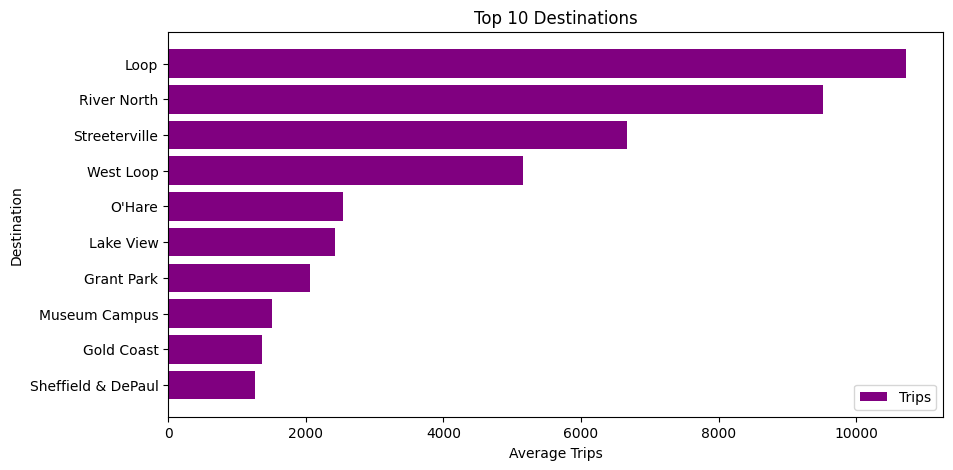

In [20]:
# Top 10 destinations visualization
plt.figure(figsize=(10, 5))
plt.barh(trips_10['dropoff_location_name'], trips_10['average_trips'], color='purple')
plt.xlabel('Average Trips')
plt.ylabel('Destination')
plt.title('Top 10 Destinations')
plt.gca().invert_yaxis()
plt.legend(['Trips'])
plt.show()

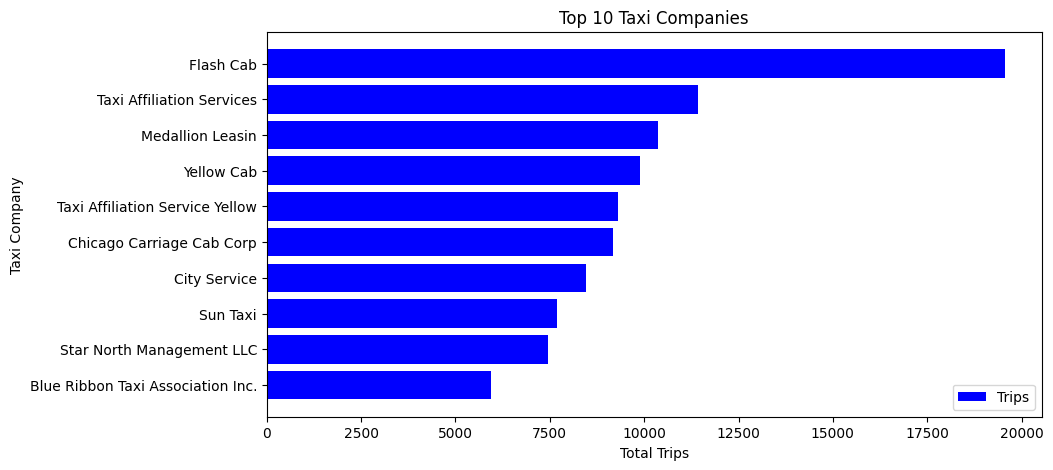

In [21]:
# Top 10 taxi companies based on the number of trips visualization
plt.figure(figsize=(10, 5))
plt.barh(taxi_10['company_name'], taxi_10['trips_amount'], color='blue')
plt.xlabel('Total Trips')
plt.ylabel('Taxi Company')
plt.title('Top 10 Taxi Companies')
plt.gca().invert_yaxis()
plt.legend(['Trips'])
plt.show()

Insight

Findings:

- The top 3 destinations are Loop, River North, & Streeterville.
- The top 3 taxi company in Chicago area are Flash Cab, Taxi Affiliation Service, & Medallion Leasing.

Insights:

- The top 4 destination make up the majority of destination in Chicago area.
- Flash Cab dominating the competition in Chicago area.

Recommendations:

- Zuber should prioritize the hiring of driver partner from the top 4 areas to boost their efficiency and advantage the trip pattern.
- Learn the success of Flash Cab, and set up the price bar for the top 4 areas slightly below Flash Cab.

## **Testing Hyphothesis**

### Data Preparation



In [22]:
trip_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
trip_ohare['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [24]:
trip_ohare['weather_conditions'].value_counts()

weather_conditions
Good    888
Bad     180
Name: count, dtype: int64

In [25]:
good = trip_ohare.query('weather_conditions == "Good"').reset_index(drop=True)
bad = trip_ohare.query('weather_conditions == "Bad"').reset_index(drop=True)

In [26]:
good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            888 non-null    object 
 1   weather_conditions  888 non-null    object 
 2   duration_seconds    888 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.9+ KB


In [27]:
bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            180 non-null    object 
 1   weather_conditions  180 non-null    object 
 2   duration_seconds    180 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


The data given is already filtered Saturday for the day

Now check the data distribution

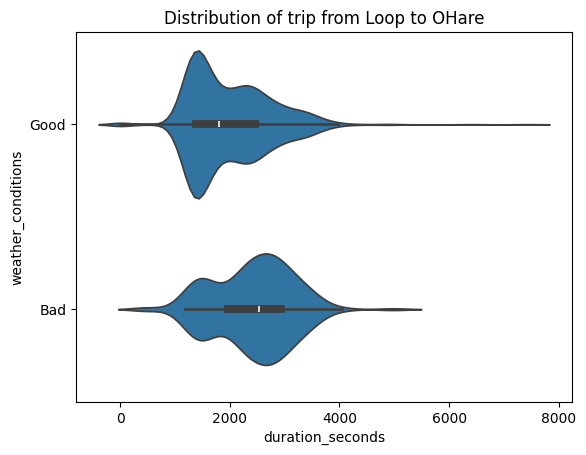

In [28]:
plt.title('Distribution of trip from Loop to OHare')
sns.violinplot(data=trip_ohare, x='duration_seconds', y='weather_conditions')
plt.show()

In [29]:
#Remove the outliers
def clean_outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)

    data = data.loc[(data[col] > lower_bound) & (data[col] < upper_bound)]
    return data

In [30]:
good = clean_outliers(data = good, col = 'duration_seconds')
good

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
883,2017-11-11 06:00:00,Good,1500.0
884,2017-11-25 11:00:00,Good,0.0
885,2017-11-11 10:00:00,Good,1318.0
886,2017-11-11 13:00:00,Good,2100.0


In [31]:
bad = clean_outliers(data = bad, col = 'duration_seconds')
bad

,start_ts,weather_conditions,duration_seconds
0,2017-11-04 16:00:00,Bad,2969.0
1,2017-11-18 12:00:00,Bad,1980.0
2,2017-11-04 17:00:00,Bad,2460.0
3,2017-11-04 16:00:00,Bad,2760.0
4,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
175,2017-11-18 12:00:00,Bad,2560.0
176,2017-11-18 10:00:00,Bad,1908.0
177,2017-11-18 12:00:00,Bad,2400.0
178,2017-11-18 16:00:00,Bad,2186.0


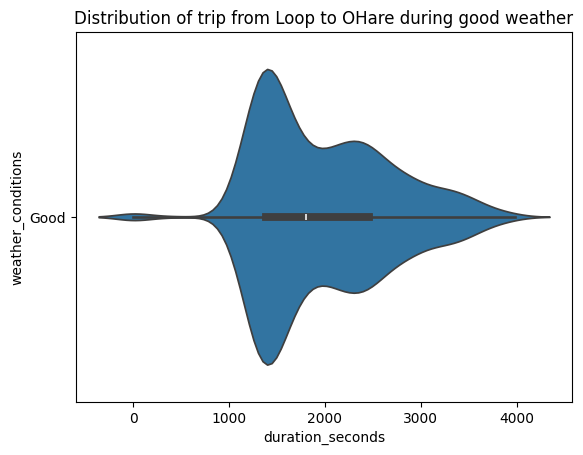

In [32]:
plt.title('Distribution of trip from Loop to OHare during good weather')
sns.violinplot(data = good, x = 'duration_seconds', y = 'weather_conditions')
plt.show()

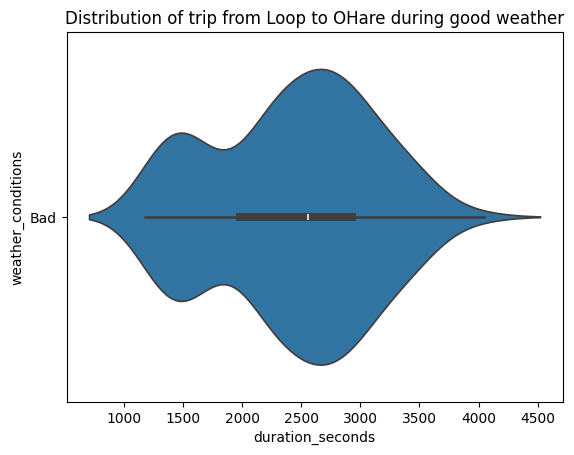

In [33]:
plt.title('Distribution of trip from Loop to OHare during good weather')
sns.violinplot(data = bad, x = 'duration_seconds', y = 'weather_conditions')
plt.show()

### Testing Hyphothesis

- H0: The average trip from Loop to O'Hare airport during rain on Saturday is the same.
- H1: The average trip from Loop to O'Hare airport during rain on Saturday is different.
- Method using : Independent two sample test because its comparing two different conditions.
- alpha: in this case we will use 0.05

In [34]:
np.var(good['duration_seconds']), np.var(bad['duration_seconds'])

(492837.27465407935, 446454.7674678413)

In [35]:
alpha = 0.05

In [36]:
p_value_levene = stats.levene(good['duration_seconds'], bad['duration_seconds']).pvalue
print(p_value_levene)

if p_value_levene > alpha:
    print('H0 is accepted: The average trip from Loop to OHare airport during rain and not rain on Saturday is the same.')
else:
    print('H0 is rejected: The average trip from Loop to OHare airport during rain and not rain on Saturday is different.')
print('The average trip from Loop to OHare during good weather on Saturday is', good['duration_seconds'].mean())
print('The average trip from Loop to OHare during bad weather on Saturday is', bad['duration_seconds'].mean())

0.3563611473946102
H0 is accepted: The average trip from Loop to OHare airport during rain and not rain on Saturday is the same.
The average trip from Loop to OHare during good weather on Saturday is 1976.8163265306123
The average trip from Loop to OHare during bad weather on Saturday is 2434.785310734463


In [37]:
p_value = stats.ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var=False).pvalue
print(p_value)

if p_value > alpha:
    print('H0 is accepted: The average trip from Loop to OHare airport during rain and not rain on Saturday is the same.')
else:
    print('H0 is rejected: The average trip from Loop to OHare airport during rain and not rain on Saturday is different.')
print('The average trip from Loop to OHare during good weather on Saturday is', good['duration_seconds'].mean())
print('The average trip from Loop to OHare during bad weather on Saturday is', bad['duration_seconds'].mean())

9.108025319217097e-15
H0 is rejected: The average trip from Loop to OHare airport during rain and not rain on Saturday is different.
The average trip from Loop to OHare during good weather on Saturday is 1976.8163265306123
The average trip from Loop to OHare during bad weather on Saturday is 2434.785310734463


Insight

Based on the hyphothesis testing.

- p_value: 9.108025319217097e-15
- H0 is rejected: The average trip from Loop to OHare airport during rain and not rain on Saturday is different.
- The average trip from Loop to OHare during good weather on Saturday is 1976.8163265306123
- The average trip from Loop to OHare during bad weather on Saturday is 2434.785310734463

## **Conclusion**

This project aims to understand the pattern of ride-sharing activities in the city of Chicago that will helps Zuber to successfully penetrate in this particular area.

1. Data Initiation

Taxi

- company_name: Name of taxi comapnies
- trips_amount: Number of trips of each taxi companies

Trips

- dropoff_location_name: destination of trip
- average_trips: number of trips

Trip_ohare

- start_ts: date of trip
- weather_conditions: condition of weather
- duration_seconds: duration of trip

2. Data Analyzing

Findings:

- The top 3 destinations are Loop, River North, & Streeterville.
- The top 3 taxi company in Chicago area are Flash Cab, Taxi Affiliation Service, & Medallion Leasing.

Insights:

- The top 4 destination make up the majority of destination in Chicago area.
- Flash Cab dominating the competition in Chicago area.

Recommendations:

- Zuber should prioritize the hiring of driver partner from the top 4 areas to boost their efficiency and advantage the trip pattern.
- Learn the success of Flash Cab, and set up the price bar for the top 4 areas slightly below Flash Cab.

5. Hyphothesis Testing

Based on the hyphothesis testing.

Using Levene method
- 0.3563611473946102
- H0 is accepted: The average trip from Loop to OHare airport during rain and not rain on Saturday is the same.
- The average trip from Loop to OHare during good weather on Saturday is 1976.8163265306123
- The average trip from Loop to OHare during bad weather on Saturday is 2434.785310734463

Using T-test
- p_value: 9.108025319217097e-15
- H0 is rejected: The average trip from Loop to OHare airport during rain and not rain on Saturday is different.
- The average trip from Loop to OHare during good weather on Saturday is 1976.8163265306123
- The average trip from Loop to OHare during bad weather on Saturday is 2434.785310734463

Highlight:

1. Based on the analysing, the top 3 destionations are Loop, River North, & Streeterville which all located in downtown Chichago.
2. The most popular company based on the trips is Flash Cab.
3. There is significant increrased of service demand during bad weather from downtown to airport.

Recommendation:

1. Zuber need to focus to sell its product to urban area or 9-5 worker that mostly located in the downtown.
2. Benchmarking should be done to Flash Cab, Taxi Affiliation Service, & Medallion Leasing.
3. For high demanding area like downtown as destination, Zuber should have really competitive price in order to get initial customer.
4. For 4 seasons and car culture city like Chicago, weather really affect the service of ride-sharing. Strategy for fluctuated price based on the demand should be implemented in order to gain revenue.
